In [1]:
import numpy as np
import pandas as pd
import math   as m
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Functions

In [2]:
def Vsualize(column_name,data):
    
    values = data[column_name].value_counts().values.round(2)
    index = data[column_name].value_counts().index
    
    color = sns.color_palette('RdBu')
    plt.figure(figsize=(7,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)
    
    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.tight_layout()
    plt.show()

In [3]:
def train_test_model(model,x_train,x_test,y_train,y_test):
    # Train model 
    model.fit(x_train,y_train) 
    
    # Test model
    y_predict = model.predict(x_test)

    #Evaluate Model
    print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
    print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
    print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
    print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
    
    # Scatter plot for real and predict data
    plt.scatter(y_test,y_predict)
    return model

In [4]:
path = '/kaggle/input/car-price-predictionused-cars/car data.csv'
data = pd.read_csv(path)

In [5]:
data.shape

(301, 9)

In [6]:
data.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
168,Honda CB Trigger,2013,0.42,0.73,12000,Petrol,Individual,Manual,0
208,i20,2017,7.90,8.10,3435,Petrol,Dealer,Manual,0
228,verna,2012,4.95,9.40,60000,Diesel,Dealer,Manual,0
41,alto k10,2014,2.55,3.98,46706,Petrol,Dealer,Manual,0
36,dzire,2015,4.65,7.20,48767,Petrol,Dealer,Manual,0
163,Bajaj Avenger 220 dtsi,2010,0.45,0.95,27000,Petrol,Individual,Manual,0
23,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
285,jazz,2016,7.40,8.50,15059,Petrol,Dealer,Automatic,0
49,ciaz,2017,7.75,9.29,37000,Petrol,Dealer,Automatic,0


# Preprocessing Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [9]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
data.duplicated().sum()

2

In [11]:
data.drop_duplicates(inplace = True)

In [12]:
data.shape

(299, 9)

In [13]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
data.drop('Car_Name',axis = 1,inplace = True)

In [15]:
object_data = data.select_dtypes(include ='object')

In [16]:
object_data

,Fuel_Type,Selling_type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [17]:
numeric_data =  data.select_dtypes(exclude ='object')

# Vsualization

  Fuel_Type  count
0    Petrol    239
1    Diesel     58
2       CNG      2 



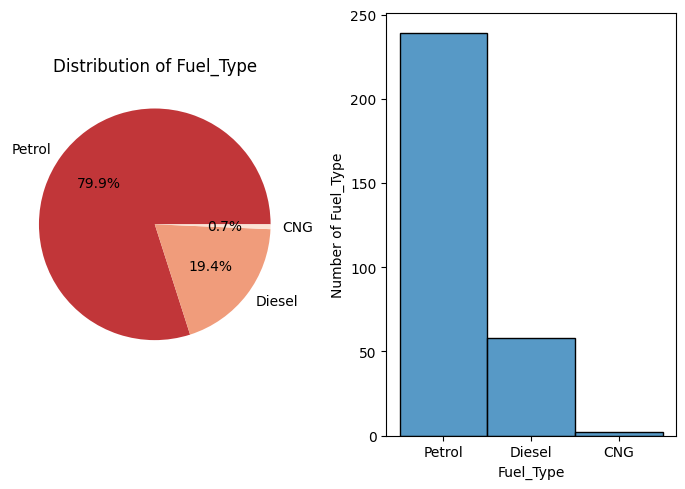

  Selling_type  count
0       Dealer    193
1   Individual    106 



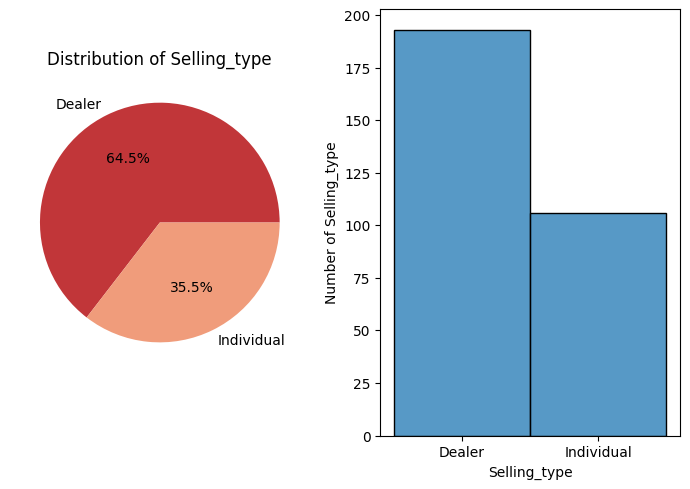

  Transmission  count
0       Manual    260
1    Automatic     39 



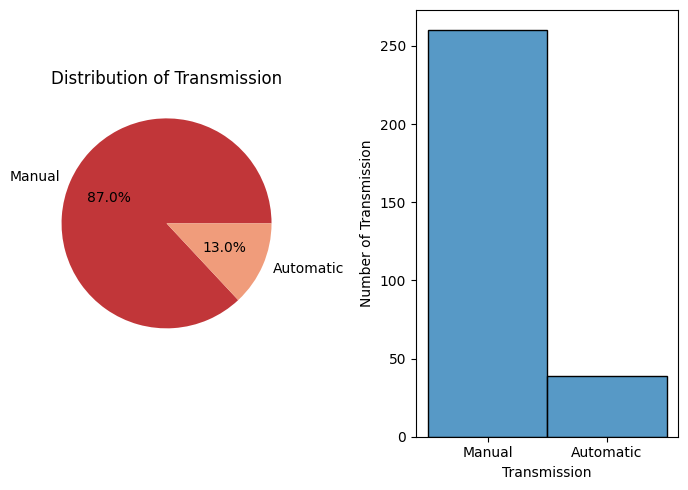

In [18]:
for column in object_data.columns:
    print(data[column].value_counts().reset_index(),'\n')
    Vsualize(column,data)

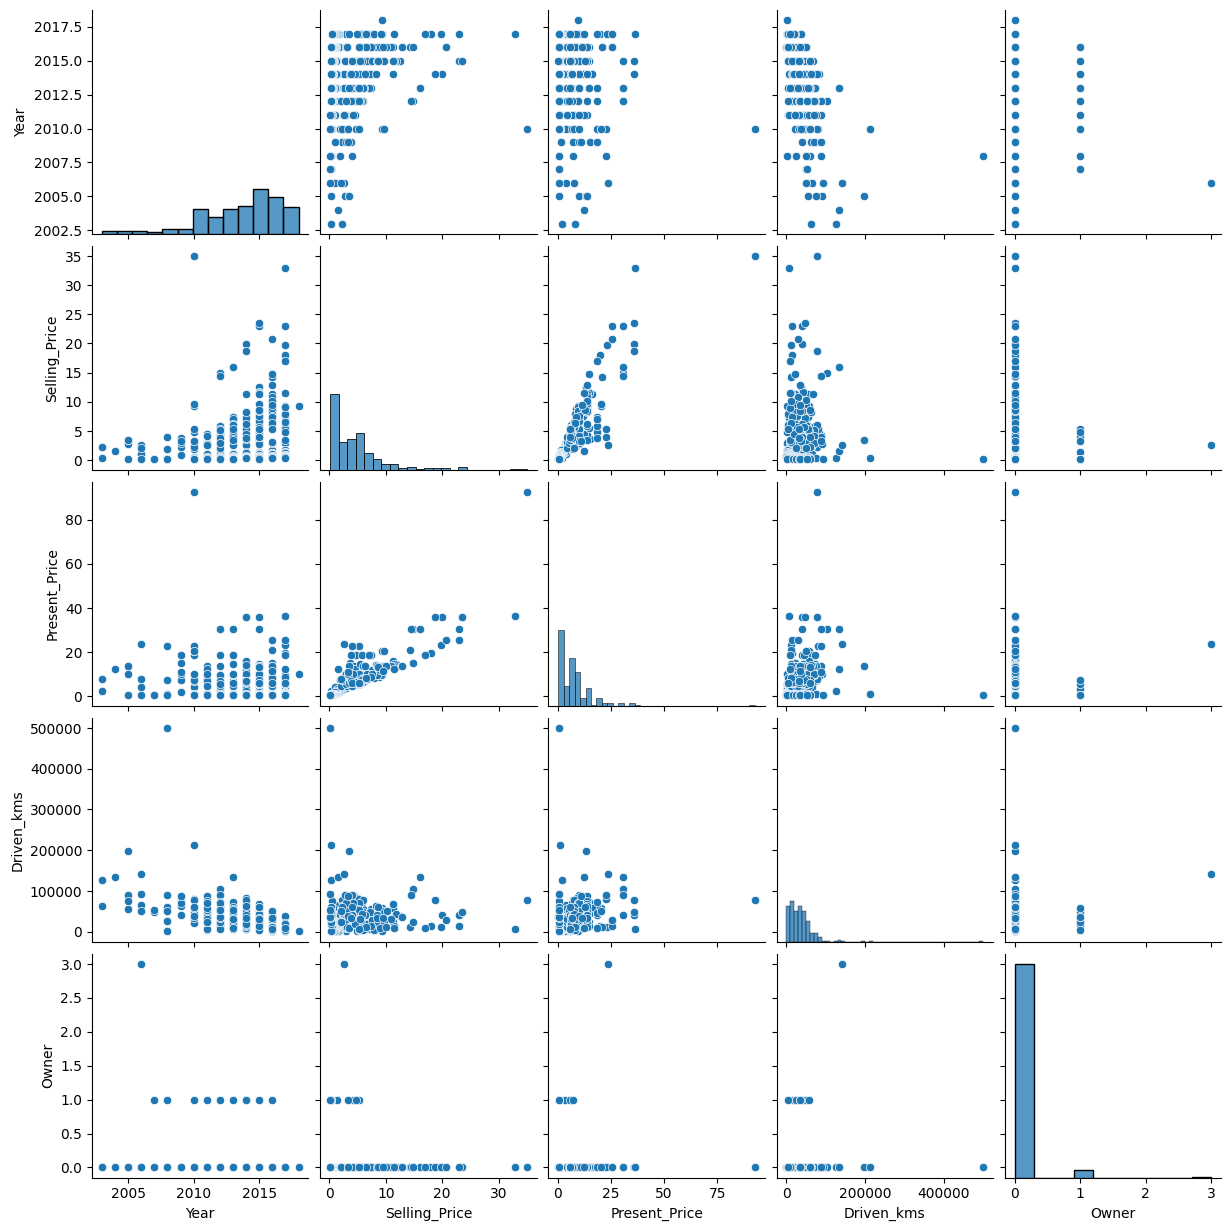

In [19]:
sns.pairplot(data)

   Owner  count
0      0    288
1      1     10
2      3      1


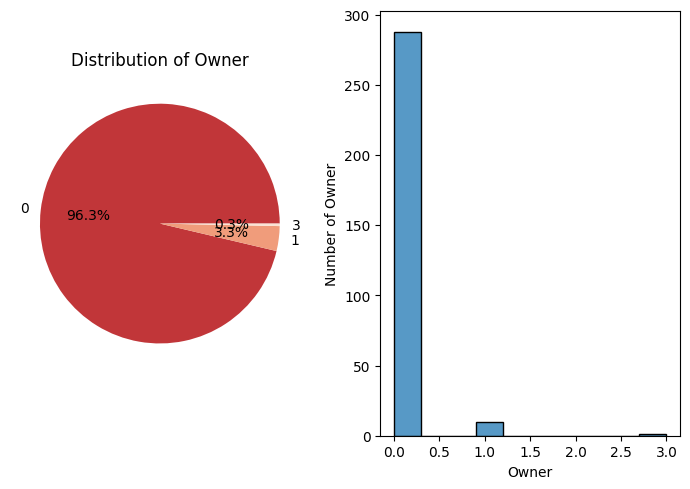

In [20]:
print(data['Owner'].value_counts().reset_index())
Vsualize('Owner',data)

In [21]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [22]:
data['Year'].value_counts()

Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

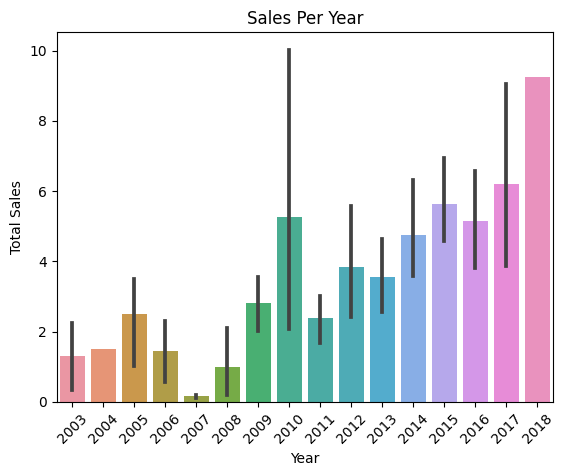

In [23]:
sns.barplot(x='Year',y='Selling_Price', data=data)
plt.title('Sales Per Year')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

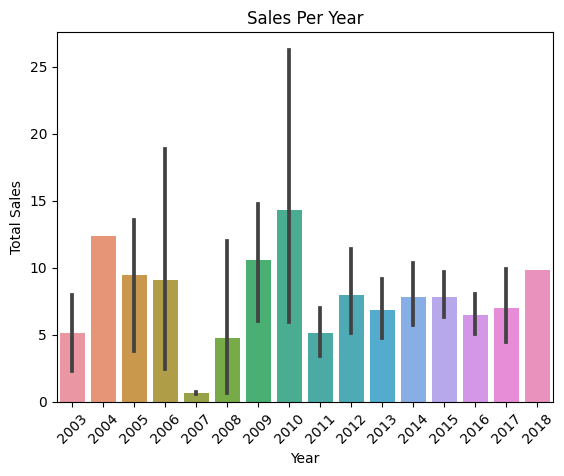

In [24]:
sns.barplot(x='Year',y='Present_Price', data=data)
plt.title('Sales Per Year')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

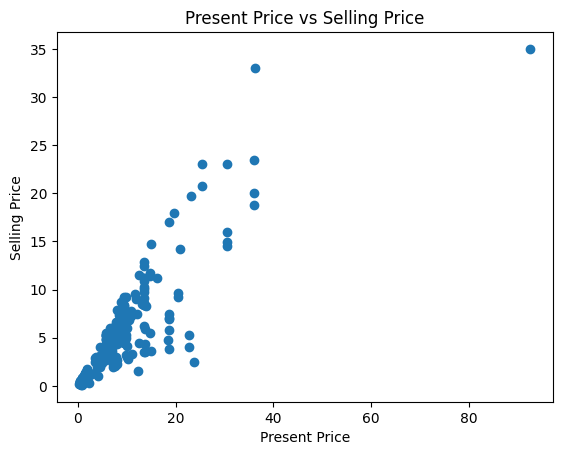

In [25]:
plt.scatter(data['Present_Price'], data['Selling_Price'])
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

In [26]:
Price_Difference = data['Present_Price'] - data['Selling_Price']

In [27]:
Price_Difference


0      2.24
1      4.79
2      2.60
3      1.30
4      2.27
       ... 
296    2.10
297    1.90
298    7.65
299    1.00
300    0.60
Length: 299, dtype: float64

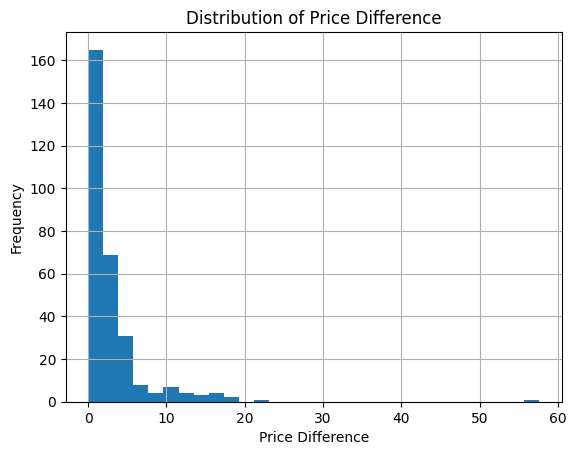

In [28]:
Price_Difference.hist(bins=30)
plt.title('Distribution of Price Difference')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()

# Convert object data

In [29]:
for column in object_data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    print(le.classes_)

['CNG' 'Diesel' 'Petrol']
['Dealer' 'Individual']
['Automatic' 'Manual']


# Feature Selection

In [30]:
correlation = data.corr()

In [31]:
correlation

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.046210,-0.036820,0.003434,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.500292,-0.553851,-0.348869,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,-0.431887,-0.511779,-0.334326,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,-0.167287,-0.101030,-0.163881,0.089367
Fuel_Type,-0.046210,-0.500292,-0.431887,-0.167287,1.000000,0.347922,0.068618,0.054174
Selling_type,-0.036820,-0.553851,-0.511779,-0.101030,0.347922,1.000000,0.058669,0.123646
Transmission,0.003434,-0.348869,-0.334326,-0.163881,0.068618,0.058669,1.000000,-0.052166
Owner,-0.181639,-0.087880,0.009948,0.089367,0.054174,0.123646,-0.052166,1.000000


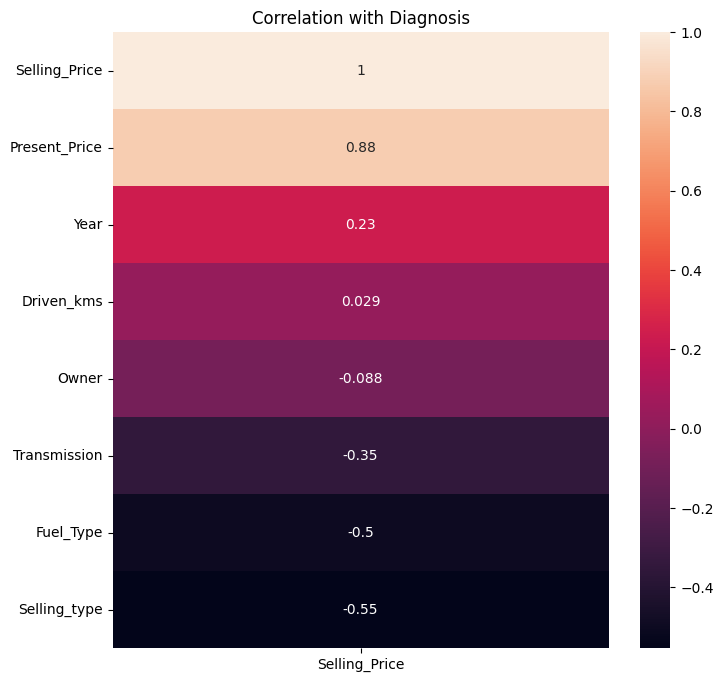

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation[['Selling_Price']].sort_values(by='Selling_Price', ascending=False), annot=True)
plt.title("Correlation with Diagnosis")
plt.show()

In [33]:
data.drop('Owner',axis = 1,inplace = True)

# Split data

In [34]:
x =data.drop('Selling_Price',axis = 1)
y = data['Selling_Price']

# Scaling data

In [35]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=45)

# Train and Test Model 

R2 Score =  84.10%
Mean Absolute Error =  1.188344311952096
Mean Squared Error =  4.009607054091655
Root Mean Squared Error =  2.0024003231351255


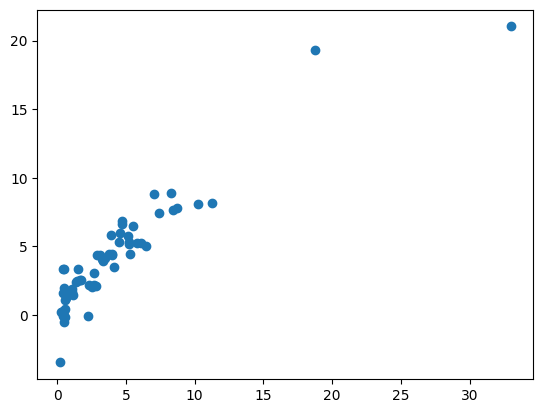

In [37]:
LR = train_test_model(LinearRegression(),x_train,x_test,y_train,y_test)

In [38]:
# the coefficients
LR.coef_
# The coefficients in a dataframe
cdf = pd.DataFrame(LR.coef_,x.columns,columns=['Coef'])
cdf.reset_index()

,index,Coef
0,Year,6.636473
1,Present_Price,38.443363
2,Driven_kms,-1.747359
3,Fuel_Type,-3.118722
4,Selling_type,-1.222607
5,Transmission,-1.382506


R2 Score =  90.81%
Mean Absolute Error =  0.6665
Mean Squared Error =  2.317485
Root Mean Squared Error =  1.5223288081094701


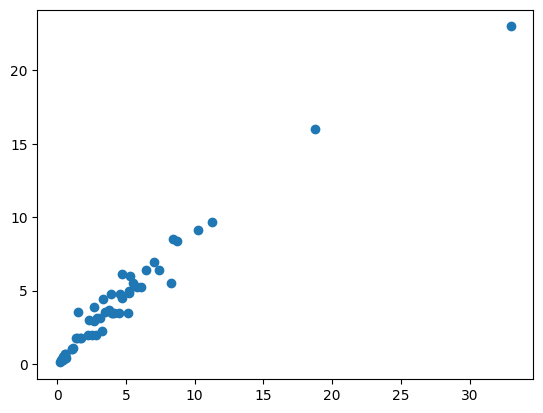

In [39]:
DR = train_test_model(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

In [40]:
importances = DR.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
1,Present_Price,0.873703
0,Year,0.090752
2,Driven_kms,0.032028
3,Fuel_Type,0.002115
5,Transmission,0.001172
4,Selling_type,0.000231


R2 Score =  90.32%
Mean Absolute Error =  0.5839299999999997
Mean Squared Error =  2.4397428709999995
Root Mean Squared Error =  1.5619676280256258


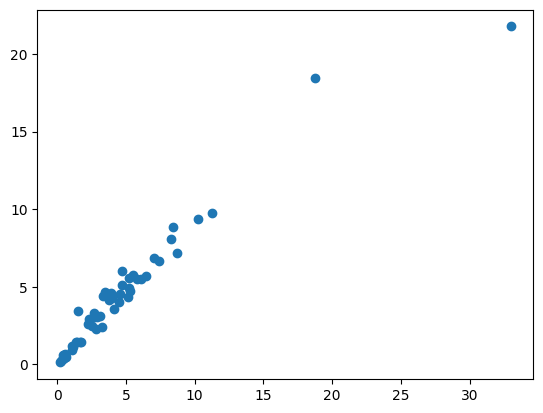

In [41]:
RF = train_test_model(RandomForestRegressor(),x_train,x_test,y_train,y_test)

In [42]:
importances = RF.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
1,Present_Price,0.855984
0,Year,0.097711
2,Driven_kms,0.023809
5,Transmission,0.010476
3,Fuel_Type,0.006069
4,Selling_type,0.005952


R2 Score =  90.96%
Mean Absolute Error =  0.6552069822102785
Mean Squared Error =  2.2792644094858376
Root Mean Squared Error =  1.5097232890453263


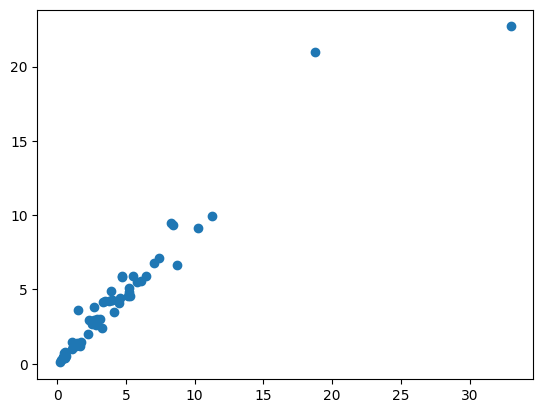

In [43]:
XG = train_test_model(XGBRegressor(),x_train,x_test,y_train,y_test)

In [44]:
importances = XG.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
1,Present_Price,0.767407
0,Year,0.112126
3,Fuel_Type,0.058066
2,Driven_kms,0.024615
4,Selling_type,0.021123
5,Transmission,0.016662
